In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import  StandardScaler
from category_encoders import TargetEncoder

import pickle



In [2]:
df = pd.read_csv("archive.zip", compression = "zip")

In [3]:
demo = pd.read_csv("archive.zip", compression = "zip")

In [4]:
df.shape

(48842, 15)

In [5]:
df = df.drop(columns = ["fnlwgt","educational-num","race"])

In [6]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,Female,0,0,30,United-States,<=50K


In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
y = y.map({"<=50K": 0, ">50K": 1})

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, stratify = y, random_state = 36)

In [10]:
num_columns = x.select_dtypes(include = ["int64","float64"]).columns
obj_columns = x.select_dtypes(include = ["object"]).columns


In [11]:

encoder = TargetEncoder(cols = obj_columns)
x_train= encoder.fit_transform(x_train,y_train)
x_test= encoder.transform(x_test)   

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Accuracy Score of Logistic Regression Train:  0.8476697463721752
Accuracy Score of Logistic Regression Test:  0.8474767120483161
Confusion Matrix of Logistic Regression: 
[[6950  481]
 [1009 1329]]


Classification Report of Logistic Regression: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7431
           1       0.73      0.57      0.64      2338

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769





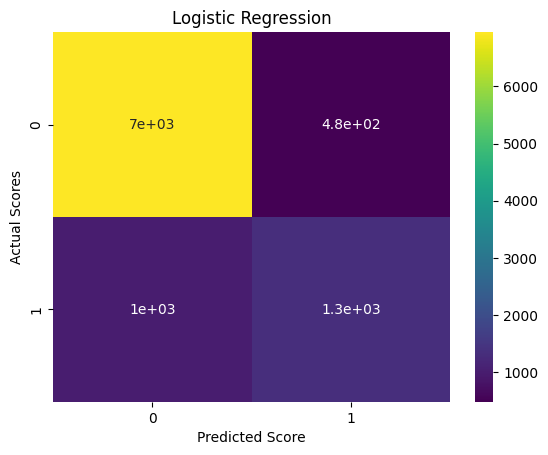

In [13]:
# model 1 = LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train,y_train)

y_pred_model1 = model1.predict(x_test)
accuracy_model1_train = model1.score(x_train,y_train)
accuracy_model1_test = model1.score(x_test,y_test)
matrix_model1 = confusion_matrix(y_test,y_pred_model1)
report_model1 = classification_report(y_test,y_pred_model1)

print("Accuracy Score of Logistic Regression Train: ",accuracy_model1_train)
print("Accuracy Score of Logistic Regression Test: ",accuracy_model1_test)
print("Confusion Matrix of Logistic Regression: ")
print(matrix_model1)
print("\n")
print("Classification Report of Logistic Regression: ")
print(report_model1)
print("\n")

sns.heatmap(matrix_model1, annot = True, cmap = "viridis")
plt.title("Logistic Regression")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of SVM Classifier Train:  0.8463644972231464
Accuracy Score of SVM Classifier Test:  0.8482956290306071
Confusion Matrix of SVM Classifier: 
[[7034  397]
 [1085 1253]]


Classification Report of SVM Classifier: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      7431
           1       0.76      0.54      0.63      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769





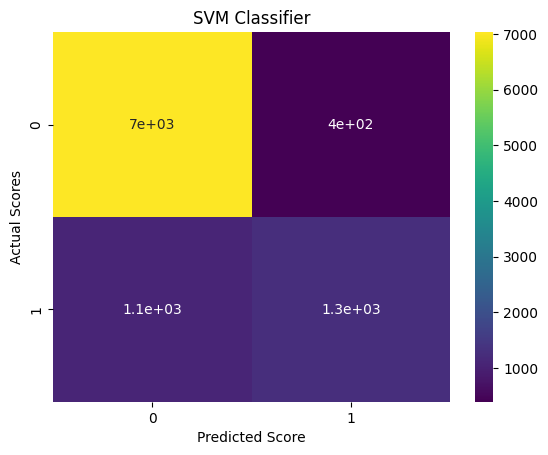

In [14]:
# model 2 = SVM Classifier

model2 = SVC(kernel = "linear")
model2.fit(x_train,y_train)

y_pred_model2 = model2.predict(x_test)
accuracy_model2_train = model2.score(x_train,y_train)
accuracy_model2_test = model2.score(x_test,y_test)
matrix_model2 = confusion_matrix(y_test,y_pred_model2)
report_model2 = classification_report(y_test,y_pred_model2)

print("Accuracy Score of SVM Classifier Train: ",accuracy_model2_train)
print("Accuracy Score of SVM Classifier Test: ",accuracy_model2_test)
print("Confusion Matrix of SVM Classifier: ")
print(matrix_model2)
print("\n")
print("Classification Report of SVM Classifier: ")
print(report_model2)
print("\n")

sns.heatmap(matrix_model2, annot = True, cmap = "viridis")
plt.title("SVM Classifier")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of Decision Tree Classifier Train:  0.8689888158063113
Accuracy Score of Decision Tree Classifier Test:  0.8620124884839799
Confusion Matrix of Decision Classifier: 
[[6995  436]
 [ 912 1426]]


Classification Report of Decision Tree Classifier: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7431
           1       0.77      0.61      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769





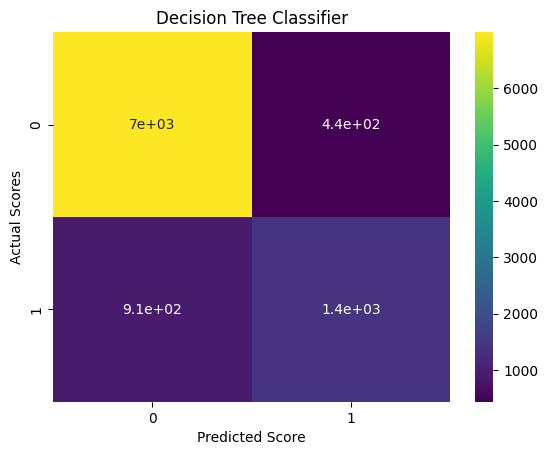

In [15]:
# model 3 = Decision Tree

model3 = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, random_state = 36)
model3.fit(x_train,y_train)

y_pred_model3 = model3.predict(x_test)
accuracy_model3_train = model3.score(x_train,y_train)
accuracy_model3_test = model3.score(x_test,y_test)
matrix_model3 = confusion_matrix(y_test,y_pred_model3)
report_model3 = classification_report(y_test,y_pred_model3)

print("Accuracy Score of Decision Tree Classifier Train: ",accuracy_model3_train)
print("Accuracy Score of Decision Tree Classifier Test: ",accuracy_model3_test)
print("Confusion Matrix of Decision Classifier: ")
print(matrix_model3)
print("\n")
print("Classification Report of Decision Tree Classifier: ")
print(report_model3)
print("\n")

sns.heatmap(matrix_model3, annot = True, cmap = "viridis")
plt.title("Decision Tree Classifier")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of Random Forest Classifier Train:  0.871087451692985
Accuracy Score of Random Forest Classifier Test:  0.86764254273723
Confusion Matrix of Random Forest Classifier: 
[[7103  328]
 [ 965 1373]]


Classification Report of Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7431
           1       0.81      0.59      0.68      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769





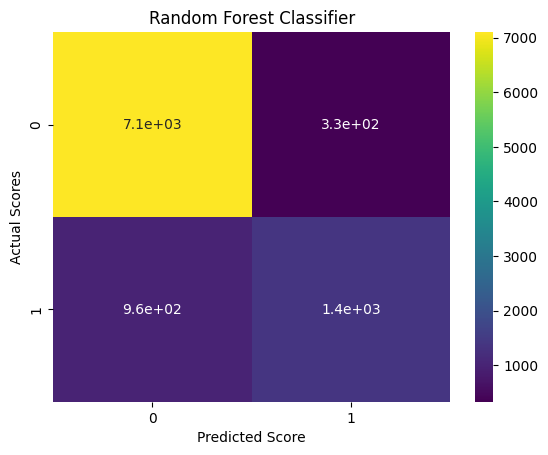

In [16]:
# model 4 = Random Forest Classifier

model4 = RandomForestClassifier(criterion = "entropy", n_estimators = 100, min_samples_split = 3, max_depth = 10, random_state = 36)
model4.fit(x_train,y_train)

y_pred_model4 = model4.predict(x_test)
accuracy_model4_train = model4.score(x_train,y_train)
accuracy_model4_test = model4.score(x_test,y_test)
matrix_model4 = confusion_matrix(y_test,y_pred_model4)
report_model4 = classification_report(y_test,y_pred_model4)

print("Accuracy Score of Random Forest Classifier Train: ",accuracy_model4_train)
print("Accuracy Score of Random Forest Classifier Test: ",accuracy_model4_test)
print("Confusion Matrix of Random Forest Classifier: ")
print(matrix_model4)
print("\n")
print("Classification Report of Random Forest Classifier: ")
print(report_model4)
print("\n")

sns.heatmap(matrix_model4, annot = True, cmap = "viridis")
plt.title("Random Forest Classifier")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of XGBoost Classifier Train:  0.9032324111278889
Accuracy Score of XGBoost Classifier Test:  0.8733749616132664
Confusion Matrix of XGBoost Classifier: 
[[6990  441]
 [ 796 1542]]


Classification Report of XGBoost Classifier: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7431
           1       0.78      0.66      0.71      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769





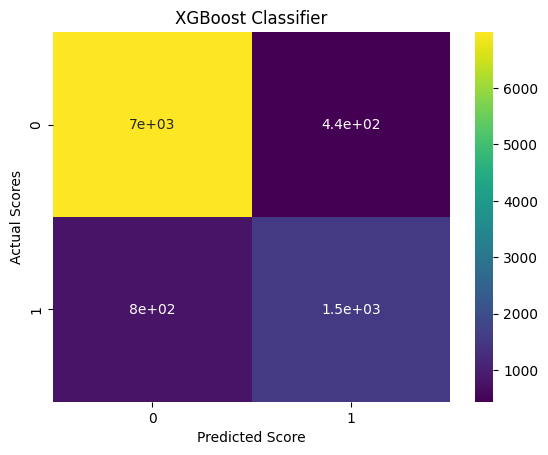

In [17]:
# model 5 = XGBoost Classifier

model5 = XGBClassifier(objective = "binary:logistic", n_estimators = 200, learning_rate = 0.1, max_depth = 10, random_state = 36)
model5.fit(x_train,y_train)

y_pred_model5 = model5.predict(x_test)
accuracy_model5_train = model5.score(x_train,y_train)
accuracy_model5_test = model5.score(x_test,y_test)
matrix_model5 = confusion_matrix(y_test,y_pred_model5)
report_model5 = classification_report(y_test,y_pred_model5)

print("Accuracy Score of XGBoost Classifier Train: ",accuracy_model5_train)
print("Accuracy Score of XGBoost Classifier Test: ",accuracy_model5_test)
print("Confusion Matrix of XGBoost Classifier: ")
print(matrix_model5)
print("\n")
print("Classification Report of XGBoost Classifier: ")
print(report_model5)
print("\n")

sns.heatmap(matrix_model5, annot = True, cmap = "viridis")
plt.title("XGBoost Classifier")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of Gaussian NB Train:  0.8313925216901696
Accuracy Score of Gaussian NB Test:  0.8324291124987204
Confusion Matrix of Gaussian NB: 
[[6886  545]
 [1092 1246]]


Classification Report of Gaussian NB: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7431
           1       0.70      0.53      0.60      2338

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769





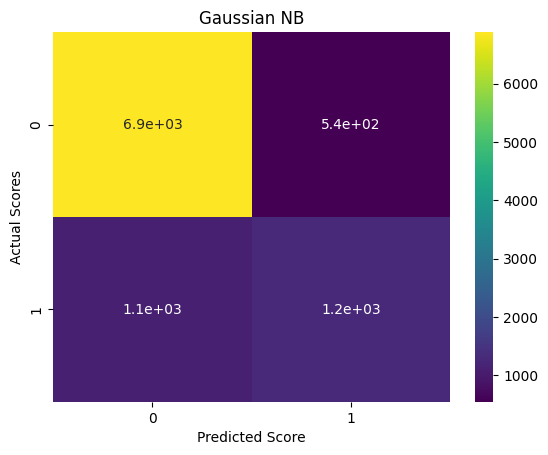

In [18]:
# model 6 = Gaussian NB

model6 = GaussianNB()
model6.fit(x_train,y_train)

y_pred_model6 = model6.predict(x_test)
accuracy_model6_train = model6.score(x_train,y_train)
accuracy_model6_test = model6.score(x_test,y_test)
matrix_model6 = confusion_matrix(y_test,y_pred_model6)
report_model6 = classification_report(y_test,y_pred_model6)

print("Accuracy Score of Gaussian NB Train: ",accuracy_model6_train)
print("Accuracy Score of Gaussian NB Test: ",accuracy_model6_test)
print("Confusion Matrix of Gaussian NB: ")
print(matrix_model6)
print("\n")
print("Classification Report of Gaussian NB: ")
print(report_model6)
print("\n")

sns.heatmap(matrix_model6, annot = True, cmap = "viridis")
plt.title("Gaussian NB")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

In [19]:
models_accuracy = {
    "Logistc Regression": accuracy_model1_test,
    "SVM Classifier": accuracy_model2_test,
    "Decision Tree Classifier": accuracy_model3_test,
    "Random Forest Classifier": accuracy_model4_test,
    "XGBClassifier": accuracy_model5_test,
    "GaussianNB": accuracy_model6_test
}

In [20]:

best_model_name = None
best_model_accuracy = 0

for a,b in models_accuracy.items():
    if b > best_model_accuracy:
        best_model_name = a
        best_model_accuracy = b

In [21]:
print(best_model_name)
print(best_model_accuracy)

XGBClassifier
0.8733749616132664


In [22]:
best_model = model5

Best model is showing XGBClassifier with accuracy of 0.8732725969904801


In [23]:
final_encoder = TargetEncoder(cols = obj_columns)
x = final_encoder.fit_transform(x,y)

final_scaler = StandardScaler()
x = final_scaler.fit_transform(x)

final_model = XGBClassifier(n_estimators = 200, objective = "binary:logistic", learning_rate = 0.1, max_depth = 10, random_state = 36)
final_model.fit(x,y)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [24]:
with open("final_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

with open("final_encoder.pkl", "wb") as file:
    pickle.dump(final_encoder, file)

with open("final_scaler.pkl", "wb") as file:
    pickle.dump(final_scaler, file)
